# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [40]:
# cell libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

## Load the Data

In [2]:
# Load dataset
df = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [4]:
df.shape

(52000, 26)

In [7]:
df.describe

<bound method NDFrame.describe of        Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident

In [8]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [9]:
df.isnull().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [12]:
df.duplicated().sum()

43

In [13]:
df['Pedestrian_Crossing-Physical_Facilities'].unique()

array(['No physical crossing within 50 meters',
       'non-junction pedestrian crossing', 'Zebra crossing',
       'Pedestrian phase at traffic signal junction', 'Central refuge',
       'Footbridge or subway'], dtype=object)

In [14]:
len(df['Pedestrian_Crossing-Physical_Facilities'].unique())

6

In [15]:
df['Year'].unique()

array([2009, 2010, 2005, 2007, 2013, 2006, 2012, 2014, 2011], dtype=int64)

In [16]:
df.corr

<bound method DataFrame.corr of        Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident_S

<Axes: xlabel='Did_Police_Officer_Attend_Scene_of_Accident', ylabel='count'>

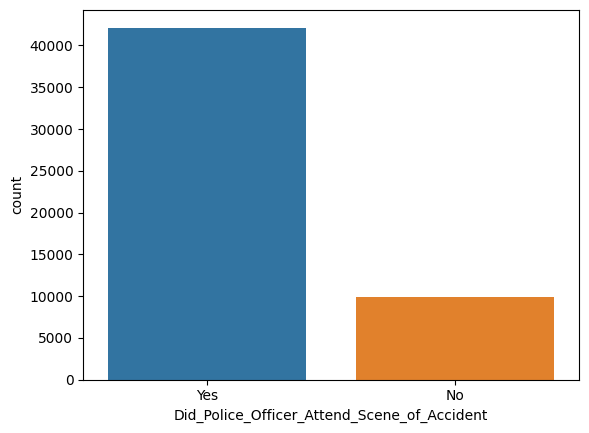

In [17]:
sns.countplot(x = 'Did_Police_Officer_Attend_Scene_of_Accident',  data = df)

C:\Users\MSI1\AppData\Local\Temp\ipykernel_13704\3888966817.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

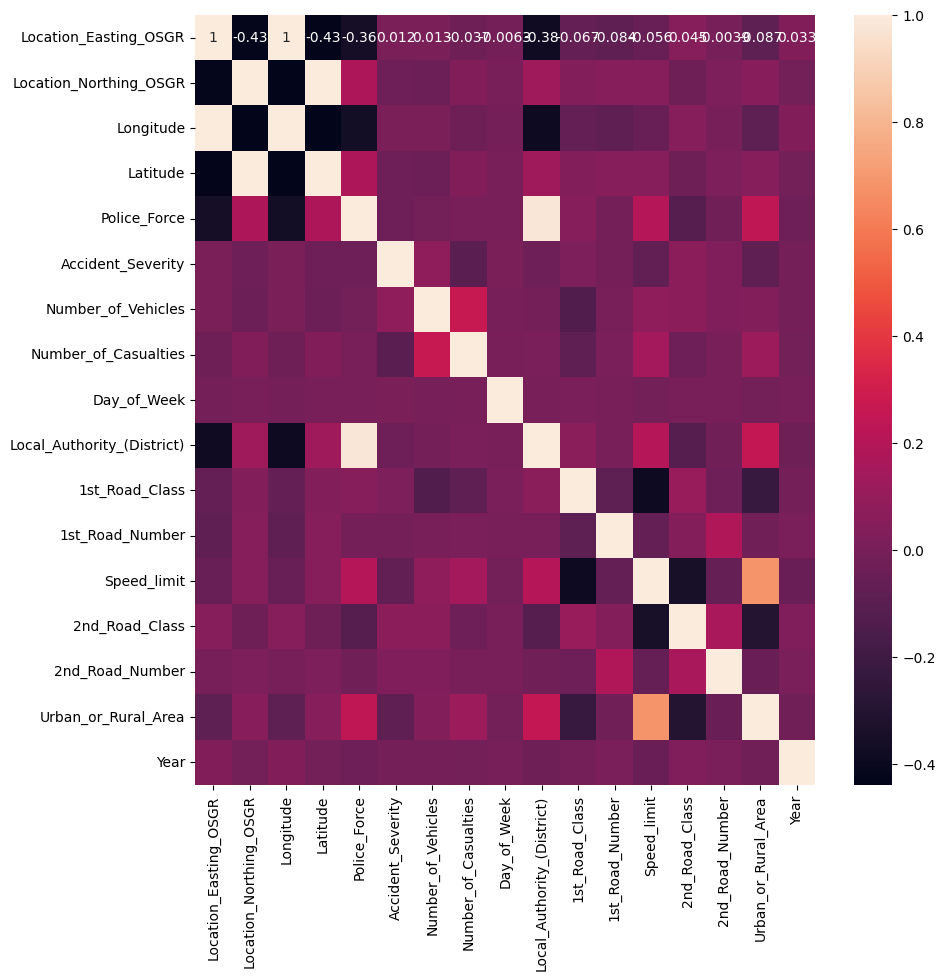

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

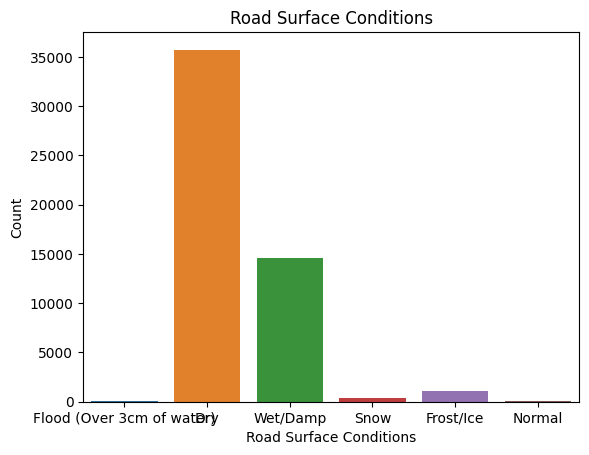

In [23]:
sns.countplot(x = 'Road_Surface_Conditions', data = df)
plt.title('Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.show()

array([[<Axes: title={'center': 'Location_Easting_OSGR'}>,
        <Axes: title={'center': 'Location_Northing_OSGR'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Police_Force'}>,
        <Axes: title={'center': 'Accident_Severity'}>,
        <Axes: title={'center': 'Number_of_Vehicles'}>,
        <Axes: title={'center': 'Number_of_Casualties'}>],
       [<Axes: title={'center': 'Day_of_Week'}>,
        <Axes: title={'center': 'Local_Authority_(District)'}>,
        <Axes: title={'center': '1st_Road_Class'}>,
        <Axes: title={'center': '1st_Road_Number'}>],
       [<Axes: title={'center': 'Speed_limit'}>,
        <Axes: title={'center': '2nd_Road_Class'}>,
        <Axes: title={'center': '2nd_Road_Number'}>,
        <Axes: title={'center': 'Urban_or_Rural_Area'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

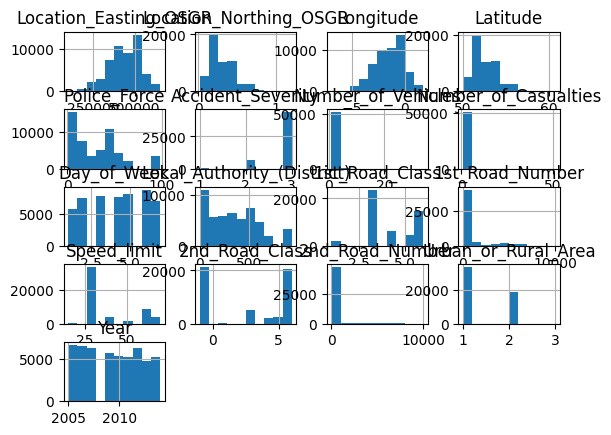

In [33]:
df.hist()

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [34]:
df.dropna(inplace = True)# drop na

In [37]:
df.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

In [38]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [67]:
# solve outlier
clV = IsolationForest(contamination=0.01)  
outlier_scores = clV.fit_predict(df[['Location_Easting_OSGR', 'Location_Northing_OSGR']])

C:\Users\MSI1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [45]:
outliers = df.loc[outlier_scores == -1]
print(f'Number of outliers detected: {len(outliers)}')

Number of outliers detected: 496


In [46]:
df = df[outlier_scores != -1]

In [54]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,2,2,0,4,1,2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,2,2,2,1,0,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,2,2,4,1,0,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,2,2,4,5,5,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,2,2,4,1,0,1.0,Yes,2013


In [53]:
#  LabelEncoder()
lm = LabelEncoder()
df['Pedestrian_Crossing-Human_Control'] = lm.fit_transform(df['Pedestrian_Crossing-Human_Control']) 
df['Pedestrian_Crossing-Physical_Facilities'] = lm.fit_transform(df['Pedestrian_Crossing-Physical_Facilities']) 
df['Light_Conditions'] = lm.fit_transform(df['Light_Conditions'])
df['Weather_Conditions'] = lm.fit_transform(df['Weather_Conditions'])
df['Road_Surface_Conditions'] = lm.fit_transform(df['Road_Surface_Conditions'])

In [55]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude']])

In [56]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,2,2,0,4,1,2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,2,2,2,1,0,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,2,2,4,1,0,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,2,2,4,5,5,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,2,2,4,1,0,1.0,Yes,2013


In [57]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [58]:
X = df[['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude']]

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

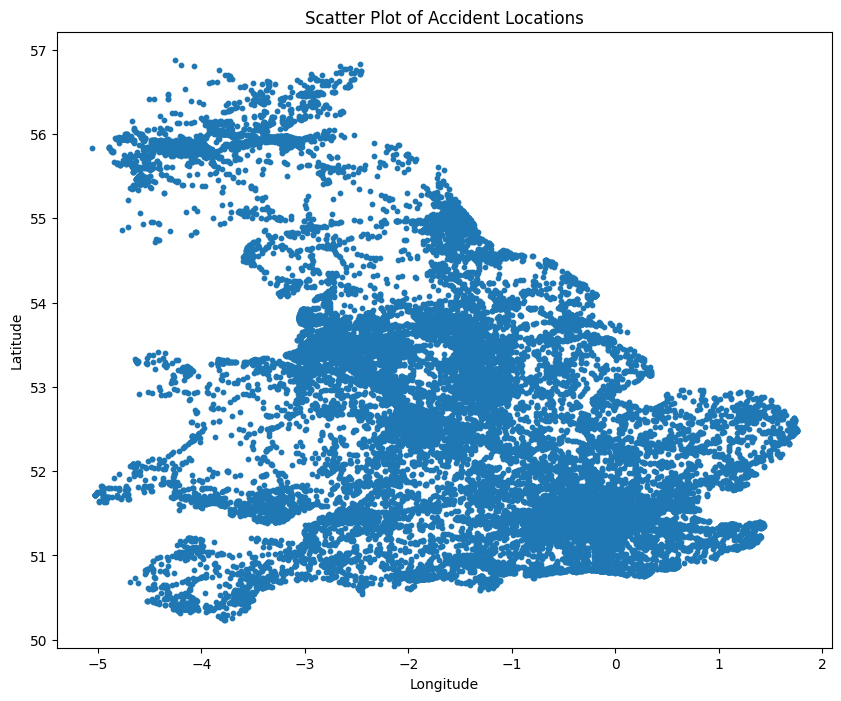

In [59]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Accident Locations')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [60]:
# Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

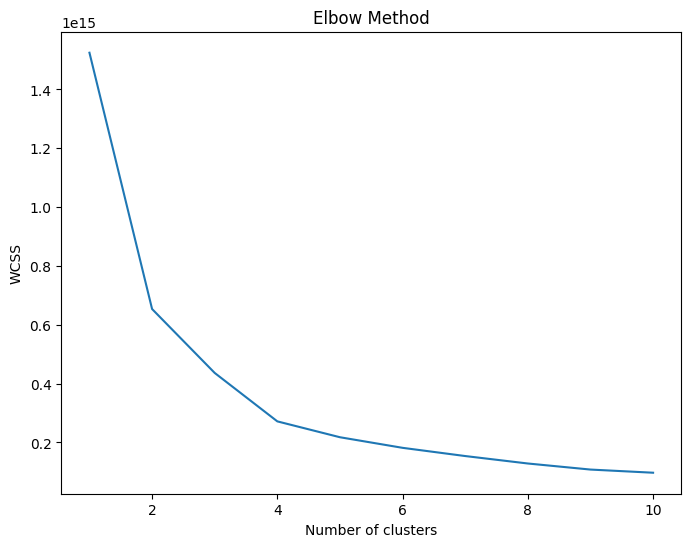

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
# train تدريب
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [63]:
silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.533


In [64]:
ch_score = calinski_harabasz_score(X, y_pred)
print(f"Calinski-Harabasz Score: {ch_score:.3f}")

Calinski-Harabasz Score: 75378.001


## Plot the data points with their predicted cluster center

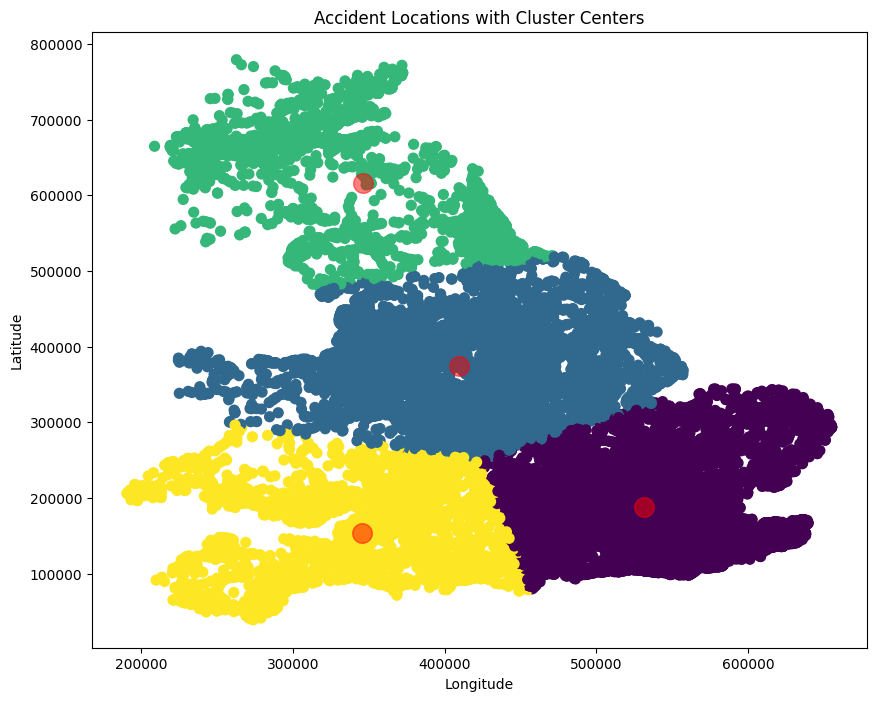

In [68]:
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Locations with Cluster Centers')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
    I selected the following features:

Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   As the only number of collections in traffic accident data, the Ebow Method, Silhouette Analysis, and Gap Statistic were used in addition to field knowledge. This flight indicated that 4-5 clusters were identified for this data, and this number was consistent with the aim of the analysis to identify geographic clusters of incidents.
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   ilhouette Score), the Calinski-Harabasz Index, and the Davies-Bouldin Index to evaluate the clustering results.
   - How do these metrics help in understanding the effectiveness of your clustering approach?
   Availability of the unified image insight into the allocation of vocabulary points data having a comprehensive comprehensive.
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?
   There are several ways to improve and develop future work on this data:

1. Explore additional clustering algorithms such as hierarchical clustering or DBSCAN to explore other patterns.

2. Incorporate additional features such as time, weather, and infrastructure to define more detailed factors.